In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as pilimg
import augmentation

img_origin = np.array(pilimg.open('data/original/images/img_Testes2.tiff'))
img_label = np.array(pilimg.open('data/original/labels/img_Testes2.png'))

rqi_len_interv = (90,90) #intervalo de tamanho para o tamanho da região de queda 
min_len_interv = (15,30) #intervalo de tamanho do valor minimo da queda
n_rqi_interv = (1,1) #intervalo de quantidades de vasos modificados
back_threshold = 3 #valor da media para que a area de fundo seja aceita como substituição da area minima

img_new, debug_full, proto_graph = augmentation.create_image(
    img_origin = img_origin,
    img_label = img_label,
    rqi_len_interv = rqi_len_interv, 
    min_len_interv = min_len_interv, 
    n_rqi_interv = n_rqi_interv,
    back_threshold = back_threshold,
    rng_seed = 0,
    highlight_center = True)

igraph not found, will not be able to convert graphs to igraph format.
Could not load skeleton library. Unable to calculate skeletons.


In [2]:
rqi_len=78
min_len=28
valid_edge_index=2
pc_index_v=8

img_augs = augmentation.create_image(
    img_origin = img_origin,
    img_label = img_label,
    rqi_len_interv = rqi_len_interv, 
    min_len_interv = min_len_interv, 
    n_rqi_interv = n_rqi_interv,
    back_threshold = back_threshold,
    rng_seed = 0,
    highlight_center = True)

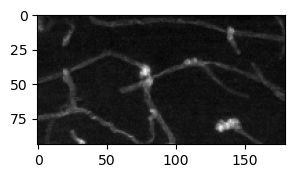

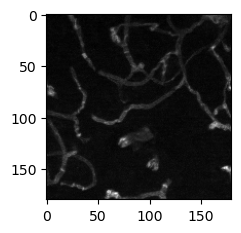

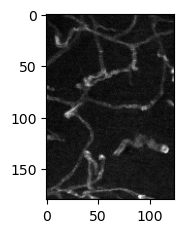

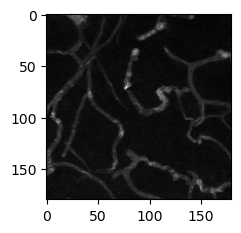

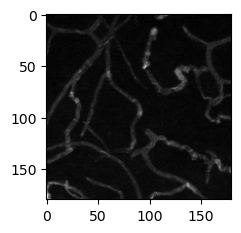

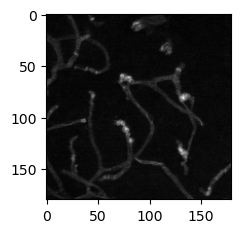

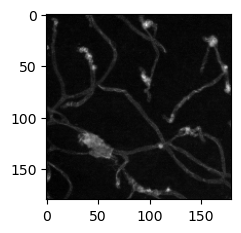

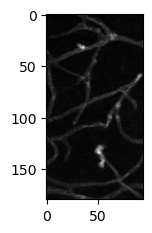

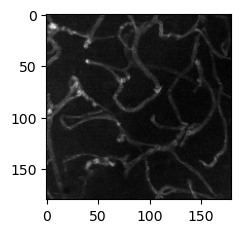

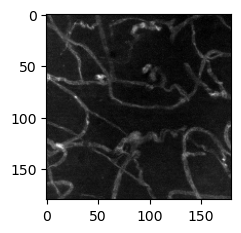

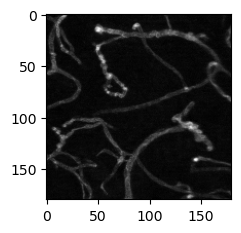

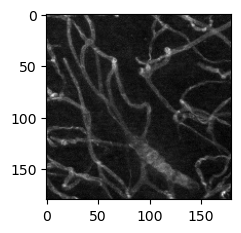

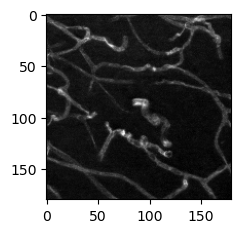

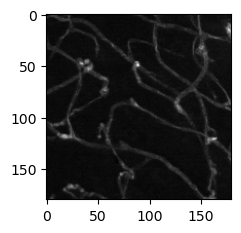

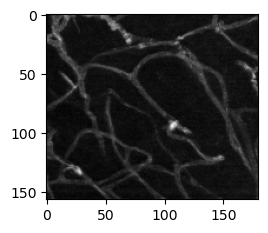

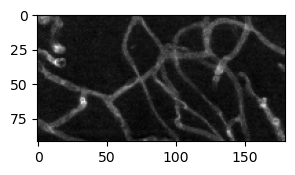

In [4]:
for img_aug in img_augs:
    plt.figure()
    plt.imshow(img_aug, 'gray')

Text(0.5, 1.0, 'Imagem final')

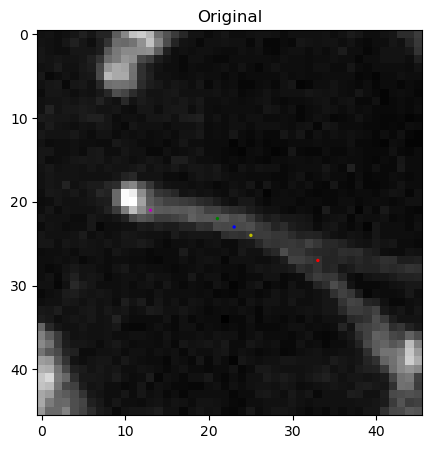

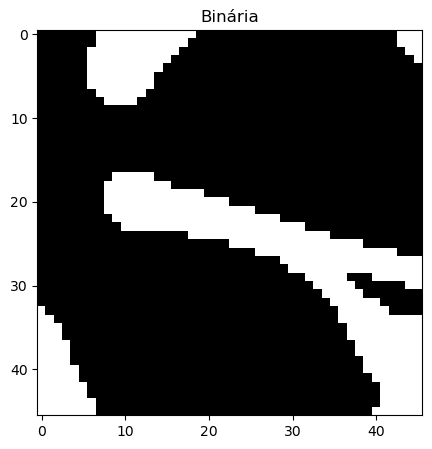

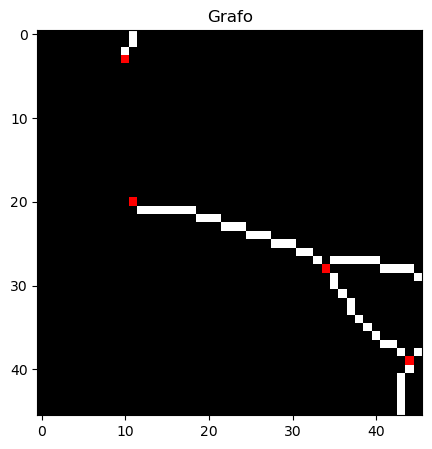

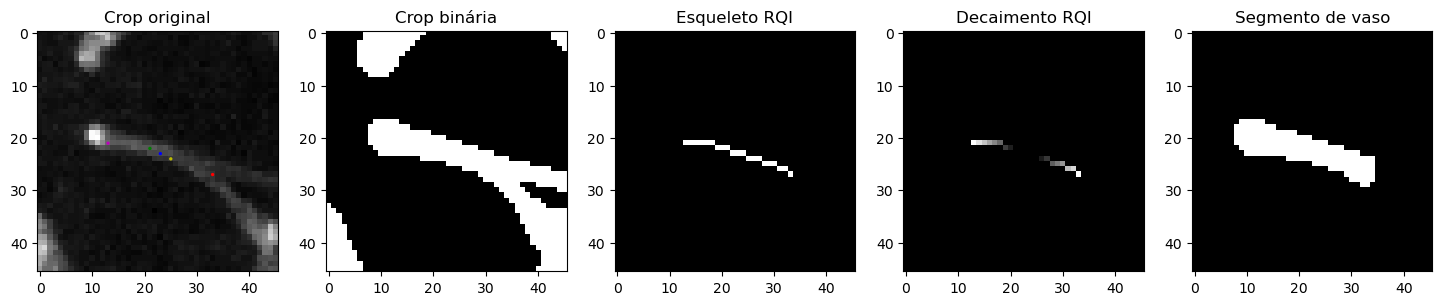

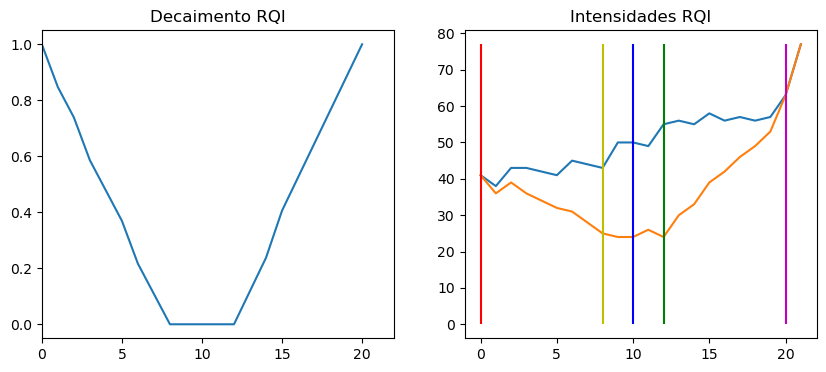

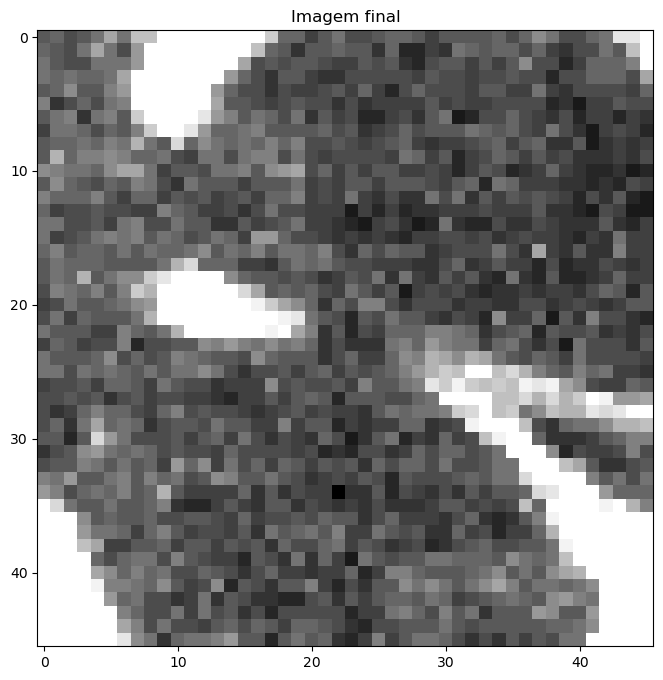

In [6]:
# oriCrop, lblCrop, newCrop, newCropDyn, img_seg_crop, rqi_int_plot, vessel_int_plot, vessel_int_new, obj_cords, idxpc, idxp1, idxp2, idxpp1, idxpp2, debug_expand = debugger[0]
# img_exp, img_ret_loc, outPutConv, img_only_back, coordsLoc, coordsLocNew, contorno = debug_expand

oriCrop, lblCrop, newCrop, newCropDyn, img_seg_crop, rqi_len, rqi_int_plot, vessel_int_plot, vessel_int_new, obj_cords, idxpc, idxp1, idxp2, idxpp1, idxpp2, debug_expand,newCrop_mod = debug_full[0]

img_exp, img_ret_loc, outPutConv, img_only_back, coordsLoc, coordsLocNew, contorno = debug_expand

img_graph = augmentation.util.graph_to_img(proto_graph, img_label.shape, node_pixels_color=(128, 128, 128),
                                  edge_color=(255, 255, 255)) # criar imagem do grafo

rqi_len_param = 100
inds = [idxp1, idxpp1, idxpc, idxpp2, idxp2]
p_row = [obj_cords[idx][0] for idx in inds]
p_col = [obj_cords[idx][1] for idx in inds]
pc = (p_row[2], p_col[2])
min_r = max([0, pc[0]-rqi_len])
min_c = max([0, pc[1]-rqi_len])
region = (slice(min_r, pc[0]+rqi_len), 
          slice(min_c, pc[1]+rqi_len))
p_row_slice = [p-min_r for p in p_row]
p_col_slice = [p-min_c for p in p_col]

plt.figure(figsize=(14,5))
# plt.subplot(1, 3, 1)
plt.imshow(img_origin[region], 'gray')
plt.scatter(p_col_slice, p_row_slice, s=2, c=['r', 'y', 'b', 'g', 'm'])
plt.title('Original')
plt.figure(figsize=(14,5))
# plt.subplot(1, 3, 2)
plt.imshow(img_label[region], 'gray')
plt.title('Binária')
plt.figure(figsize=(14,5))
# plt.subplot(1, 3, 3)
plt.imshow(img_graph[region], 'gray')
plt.title('Grafo')

plt.figure(figsize=(18,4))
plt.subplot(1, 5, 1)
plt.imshow(oriCrop, 'gray')
plt.scatter(p_col_slice, p_row_slice, s=2, c=['r', 'y', 'b', 'g', 'm'])
plt.title('Crop original')
plt.subplot(1, 5, 2)
plt.imshow(lblCrop, 'gray')
plt.title('Crop binária')
plt.subplot(1, 5, 3)
plt.imshow(newCrop, 'gray')
plt.title('Esqueleto RQI')
plt.subplot(1, 5, 4)
plt.imshow(newCropDyn, 'gray')
plt.title('Decaimento RQI')
plt.subplot(1, 5, 5)
plt.imshow(img_seg_crop, 'gray')
plt.title('Segmento de vaso')

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(rqi_int_plot)
plt.xlim((0,len(vessel_int_plot)))
plt.title('Decaimento RQI')
plt.subplot(1, 2, 2)
plt.plot(vessel_int_plot)
plt.plot(vessel_int_new)
plt.vlines([idxp1, idxpp1, idxpc, idxpp2, idxp2], ymin=0, ymax=max(vessel_int_plot), colors=['r', 'y', 'b', 'g', 'm'])
plt.title('Intensidades RQI')

# View final result
plt.figure(figsize=(8,8))
plt.imshow(img_new[region], 'gray', vmax=40)
plt.title('Imagem final')


In [5]:
tamanhoVasos,vlr_min, vlr_max = augmentation.extract_full_length(proto_graph)
media = np.mean(tamanhoVasos)
print('Tamanho minimo de vaso')
print(vlr_min)
print('Tamanho maximo de vaso')
print(vlr_max)
print('Tamanho medio de vaso')
print(media)

Tamanho minimo de vaso
0.0
Tamanho maximo de vaso
99.50376877284599
Tamanho medio de vaso
14.35304780270989
